# Install

In [ ]:
!pip3 install pshmodule

In [ ]:
!pip3 install pickle5

In [ ]:
!pip3 install pandas==1.5.0

In [ ]:
!pip3 install swifter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [ ]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [ ]:
df1 = fm.load(cfg.data_path_v1)
df2 = fm.load(cfg.data_path_v2)

extension : .xlsx
Loaded 21962 records from drive/MyDrive/MemeProject/data/row_data/meme_v1.xlsx
extension : .xlsx
Loaded 14640 records from drive/MyDrive/MemeProject/data/row_data/meme_v2.xlsx


In [ ]:
new_header = df1.iloc[1]
df1 = df1[2:]
df1.columns = new_header

Merge

In [ ]:
df1 = df1[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]
df2 = df2[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]

In [ ]:
df2.head()

In [ ]:
print(len(df1))
print(len(df2))

In [ ]:
df_A = df2[df2['관리번호'].str.startswith('A')]
df_E = df2[df2['관리번호'].str.startswith('E')]

In [ ]:
df = pd.concat([df_A, df1, df_E])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

Numbering

In [ ]:
# no
num_list = [i+1 for i in range(len(df))]
df['num'] = num_list

# group no
g_list = []
num = 1
for i in range(len(df)):
  if i % 24 == 0 and i != 0:
    num += 1
  g_list.append(num)

df['g_num'] = g_list

In [ ]:
df = df[['num', 'g_num', 'utt', '발화구분',	'대화소재', '화행(U)', '발화문', 'ARG1', 'ARG_op']]
df.rename(columns={'발화구분':'type', '발화문':'u',	'대화소재':'material', '화행(U)':'speech', 'ARG1':'arg1', 'ARG_op':'arg_op'}, inplace=True)
df = df.fillna('')

In [ ]:
df.head()

Reshape

In [ ]:
result = []
temp = []

for i in tqdm(df.iterrows()):
  temp.append([i[1]['num'], i[1]['g_num'], i[1]['utt'], i[1]['type'], i[1]['u'], i[1]['arg1'], i[1]['arg_op'], i[1]['material'], i[1]['speech']])
  
  if i[1]['num'] % 24 == 0 and i[1]['num'] != 0:
    temp_u = temp[:6]
    temp_cpr = temp[6:12]
    temp_mm = temp[12:18]
    temp_cpo = temp[18:24]

    for u in temp_u:
      # 밈 조합
      for cpr in temp_cpr:
        for mm in temp_mm:
          for cpo in temp_cpo:
            meme = "{} {} {}".format(cpr[4], mm[4], cpo[4]).strip()
            result.append([u[0], u[1], u[2], u[7], u[8], u[4], meme, u[5], u[6]])
    # 24개 씩 초기화
    temp = []

In [ ]:
len(result)

In [ ]:
df = pd.DataFrame(result, columns=[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op']])

In [ ]:
df.head(10)

arg_op 쉼표 기준으로 쪼개기

In [ ]:
df['arg_op1'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[0])
df['arg_op2'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[1])

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df = df[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op1', 'arg_op2']]

In [ ]:
df.head()

In [ ]:
df.iloc[430:440]

Temp Save

In [ ]:
fm.save(cfg.origin_ref, df)

# Reduce Class

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [ ]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import numpy as np
import swifter
from pshmodule.utils import filemanager as fm

In [ ]:
df = fm.load(cfg.origin_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_ref.pickle


In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,


Reduce Class

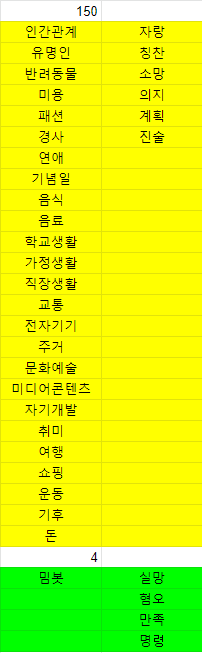

##### 대화소재

In [ ]:
material = [i[0] for i in df.material.values.tolist()]

In [ ]:
material = list(set(material))

In [ ]:
material.remove('밈봇')
material.sort()

material_bot = []
material_bot.append('밈봇')

##### 화행

In [ ]:
speech = [i[0] for i in df.speech.values.tolist()]

In [ ]:
speech = list(set(speech))

In [ ]:
speech.sort()

In [ ]:
speech.remove('실망')
speech.remove('혐오')
speech.remove('만족')
speech.remove('명령')

speech_bot = []
speech_bot.append('만족')
speech_bot.append('명령')
speech_bot.append('실망')
speech_bot.append('혐오')

##### Combine

In [ ]:
combine = []

for i in material:
  for j in speech:
    combine.append((i, j))

for ii in material_bot:
  for jj in speech_bot:
    combine.append((ii, jj))

##### Find key

In [ ]:
# 해당 값 없음
# combine.remove(('인간관계', '계획'))

In [ ]:
com_dict = {v: k for k, v in enumerate(combine)}

In [ ]:
print(com_dict)

{('가정생활', '계획'): 0, ('가정생활', '소망'): 1, ('가정생활', '의지'): 2, ('가정생활', '자랑'): 3, ('가정생활', '진술'): 4, ('가정생활', '칭찬'): 5, ('경사', '계획'): 6, ('경사', '소망'): 7, ('경사', '의지'): 8, ('경사', '자랑'): 9, ('경사', '진술'): 10, ('경사', '칭찬'): 11, ('교통', '계획'): 12, ('교통', '소망'): 13, ('교통', '의지'): 14, ('교통', '자랑'): 15, ('교통', '진술'): 16, ('교통', '칭찬'): 17, ('기념일', '계획'): 18, ('기념일', '소망'): 19, ('기념일', '의지'): 20, ('기념일', '자랑'): 21, ('기념일', '진술'): 22, ('기념일', '칭찬'): 23, ('기후', '계획'): 24, ('기후', '소망'): 25, ('기후', '의지'): 26, ('기후', '자랑'): 27, ('기후', '진술'): 28, ('기후', '칭찬'): 29, ('돈', '계획'): 30, ('돈', '소망'): 31, ('돈', '의지'): 32, ('돈', '자랑'): 33, ('돈', '진술'): 34, ('돈', '칭찬'): 35, ('문화예술', '계획'): 36, ('문화예술', '소망'): 37, ('문화예술', '의지'): 38, ('문화예술', '자랑'): 39, ('문화예술', '진술'): 40, ('문화예술', '칭찬'): 41, ('미디어콘텐츠', '계획'): 42, ('미디어콘텐츠', '소망'): 43, ('미디어콘텐츠', '의지'): 44, ('미디어콘텐츠', '자랑'): 45, ('미디어콘텐츠', '진술'): 46, ('미디어콘텐츠', '칭찬'): 47, ('미용', '계획'): 48, ('미용', '소망'): 49, ('미용', '의지'): 50, ('미용', '자랑'): 51, ('미용', '진술'): 52, ('미용', 

##### Lable Table Save

In [ ]:
df_table = pd.DataFrame.from_dict(data=com_dict, orient='index')

In [ ]:
df_table.reset_index(inplace=True)

In [ ]:
df_table.rename(columns={'index':'name', 0:'index'}, inplace=True)

In [ ]:
df_table.head()

,name,index
0,"(가정생활, 계획)",0
1,"(가정생활, 소망)",1
2,"(가정생활, 의지)",2
3,"(가정생활, 자랑)",3
4,"(가정생활, 진술)",4


In [ ]:
fm.save(cfg.label, df_table)

file exists
exceptions must derive from BaseException


##### Make Label

In [ ]:
class_list = []

for i in df.iterrows():
  class_list.append(com_dict[(i[1]['material'], i[1]['speech'])])

In [ ]:
df['label'] = class_list

In [ ]:
df.tail()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
181699,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님... 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181700,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시네! 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181701,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길이 이모님 힘숨찐이시라능 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181702,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,대길좌 이모님이 우승자라구?! 상상도 못한 정체 ㄴㅇㄱ,,전국노래자랑에서,,9
181703,36582,1525,6,경사,자랑,전국노래자랑에서 이모가 1등했다,"대길쓰 이모님,, 힘숨찐ㄷㄷ 상상도 못한 정체 ㄴㅇㄱ",,전국노래자랑에서,,9


##### Ref Save

In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,146
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,146
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,146
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,146
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,146


In [ ]:
fm.save(cfg.origin_class153_ref, df)

Saved 181704 records


##### Train Save

In [ ]:
df = df[['num', 'g_num', 'u_num', 'u', 'label', 'material', 'speech']]

In [ ]:
df.rename(columns={'u':'content'}, inplace=True)

<ipython-input-24-41d7377a9dbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'u':'content'}, inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-25-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df = df[['content', 'label']]

##### table save

In [ ]:
com_check = {k: v  for k, v in enumerate(combine)}

In [ ]:
check = {i[1]['label']: 0 for i in df.iterrows()}

for i in df.iterrows():
  check[i[1]['label']] += 1

In [ ]:
check_result = {', '.join(com_check[i[0]]): i[1] for i in check.items()}

In [ ]:
df_check_result = pd.DataFrame.from_dict(data=check_result, orient='index')

In [ ]:
df_check_result.reset_index(inplace=True)

In [ ]:
df_check_result.rename(columns={'index':'대화소재/화행', 0:'count'}, inplace=True)

In [ ]:
df_check_result.sort_values('count', ascending=False, inplace=True)

In [ ]:
df_check_result.reset_index(drop=True, inplace=True)

In [ ]:
df_check_result.head()

,대화소재/화행,label
0,"밈봇, 명령",492
1,"밈봇, 혐오",486
2,"밈봇, 실망",480
3,"밈봇, 만족",480
4,"기후, 진술",144


In [ ]:
fm.save(cfg.report_label, df_check_result)

Saved 153 records


##### Save

In [ ]:
fm.save(cfg.train_data, df)

In [ ]:
df = fm.load(cfg.train_data)

In [ ]:
df.head()

# Under Sampling

In [ ]:
df = df[['num', 'g_num', 'u_num', 'u', 'label', 'material', 'speech']]
df.rename(columns={'u':'content'}, inplace=True)
df.drop_duplicates(inplace=True)

<ipython-input-29-88c14f482bff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'u':'content'}, inplace=True)
<ipython-input-29-88c14f482bff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df_149 = df[df.label.values == 149]
df_150 = df[df.label.values == 150]
df_151 = df[df.label.values == 151]
df_152 = df[df.label.values == 152]

df_149 = df_149.sample(frac=1).reset_index(drop=True)
df_150 = df_150.sample(frac=1).reset_index(drop=True)
df_151 = df_151.sample(frac=1).reset_index(drop=True)
df_152 = df_152.sample(frac=1).reset_index(drop=True)

df_149 = df_149[:150]
df_150 = df_150[:150]
df_151 = df_151[:150]
df_152 = df_152[:150]

In [ ]:
df_drop_1 = df[df.label.values != 149]
df_drop_2 = df_drop_1[df_drop_1.label.values != 150]
df_drop_3 = df_drop_2[df_drop_2.label.values != 151]
df_drop = df_drop_3[df_drop_3.label.values != 152]

In [ ]:
df = pd.concat([df_149, df_150, df_151, df_152, df_drop])

In [ ]:
df.shape

(7812, 7)

In [ ]:
df.label.value_counts()

(label,)
152         150
151         150
150         150
149         150
28          144
           ... 
83            6
112           6
35            6
30            6
24            6
Length: 153, dtype: int64

##### 건수 30 미만 제거

In [ ]:
df_check = df[['material', 'speech', 'label']]

In [ ]:
check = {i[1]['label']: 0 for i in df_check.iterrows()}

for i in df_check.iterrows():
  check[i[1]['label']] += 1

In [ ]:
temp = sorted(check.items(), key=lambda x: x[1], reverse=True)

In [ ]:
check_result = [i[0] for i in temp if i[1] >= 30]

In [ ]:
df_list = []

for i in df.iterrows():
  if i[1]['label'] in check_result:
    df_list.append([i[1]['content'], i[1]['material'], i[1]['speech']])

df_result = pd.DataFrame(df_list, columns=['content', 'material', 'speech'])

In [ ]:
df_result.head()

,content,material,speech
0,너 밈 조사 꽤 하는구나?! 최고!,밈봇,만족
1,난 너가 존나 좋다,밈봇,만족
2,너 쫌 귀엽쓰,밈봇,만족
3,대춘아 늘 고맙다,밈봇,만족
4,얘 웃음소리 완전 따스하네,밈봇,만족


In [ ]:
temp = []
for i in df_result.iterrows():
  temp.append(f"{i[1]['material']}, {i[1]['speech']}")

In [ ]:
df_result['temp'] = temp

In [ ]:
df_result.temp.value_counts()

밈봇, 만족      150
밈봇, 실망      150
밈봇, 혐오      150
밈봇, 명령      150
유명인, 칭찬     144
           ... 
패션, 의지       30
취미, 칭찬       30
가정생활, 소망     30
인간관계, 소망     30
여행, 칭찬       30
Name: temp, Length: 120, dtype: int64

##### Class Redefinition

In [ ]:
temp_comdict = {i[0]: i[1] for i in com_dict.items() if i[1] in check_result}

In [ ]:
result_com_dict = {}
num = 0

for i in temp_comdict.items():
  result_com_dict[i[0]] = num
  num += 1

In [ ]:
result_com_dict

{('가정생활', '계획'): 0,
 ('가정생활', '소망'): 1,
 ('가정생활', '의지'): 2,
 ('가정생활', '자랑'): 3,
 ('가정생활', '진술'): 4,
 ('가정생활', '칭찬'): 5,
 ('경사', '계획'): 6,
 ('경사', '의지'): 7,
 ('경사', '자랑'): 8,
 ('경사', '진술'): 9,
 ('교통', '계획'): 10,
 ('교통', '소망'): 11,
 ('교통', '의지'): 12,
 ('교통', '자랑'): 13,
 ('교통', '진술'): 14,
 ('교통', '칭찬'): 15,
 ('기념일', '계획'): 16,
 ('기념일', '소망'): 17,
 ('기념일', '의지'): 18,
 ('기념일', '자랑'): 19,
 ('기후', '소망'): 20,
 ('기후', '의지'): 21,
 ('기후', '진술'): 22,
 ('기후', '칭찬'): 23,
 ('돈', '소망'): 24,
 ('돈', '의지'): 25,
 ('돈', '자랑'): 26,
 ('돈', '진술'): 27,
 ('문화예술', '계획'): 28,
 ('문화예술', '소망'): 29,
 ('문화예술', '의지'): 30,
 ('문화예술', '자랑'): 31,
 ('문화예술', '진술'): 32,
 ('문화예술', '칭찬'): 33,
 ('미디어콘텐츠', '계획'): 34,
 ('미디어콘텐츠', '소망'): 35,
 ('미디어콘텐츠', '진술'): 36,
 ('미디어콘텐츠', '칭찬'): 37,
 ('미용', '계획'): 38,
 ('미용', '소망'): 39,
 ('미용', '의지'): 40,
 ('미용', '자랑'): 41,
 ('미용', '진술'): 42,
 ('미용', '칭찬'): 43,
 ('반려동물', '소망'): 44,
 ('반려동물', '자랑'): 45,
 ('반려동물', '진술'): 46,
 ('반려동물', '칭찬'): 47,
 ('쇼핑', '계획'): 48,
 ('쇼핑', '소망'): 49,
 ('쇼핑', '의지'

In [ ]:
df_table = pd.DataFrame.from_dict(data=result_com_dict, orient='index')

In [ ]:
df_table.reset_index(inplace=True)

In [ ]:
df_table.rename(columns={'index':'name', 0:'index'}, inplace=True)

In [ ]:
df_table.tail()

,name,index
115,"(학교생활, 진술)",115
116,"(밈봇, 만족)",116
117,"(밈봇, 명령)",117
118,"(밈봇, 실망)",118
119,"(밈봇, 혐오)",119


In [ ]:
df_table.shape

(120, 2)

In [ ]:
fm.save(cfg.under_label, df_table)

file exists
exceptions must derive from BaseException


##### Train Save

In [ ]:
label = []

for i in df_result.iterrows():
  label.append(result_com_dict[(i[1]['material'], i[1]['speech'])])

In [ ]:
df_result['label'] = label

In [ ]:
df_result.head()

,content,material,speech,temp,label
0,너 밈 조사 꽤 하는구나?! 최고!,밈봇,만족,"밈봇, 만족",116
1,난 너가 존나 좋다,밈봇,만족,"밈봇, 만족",116
2,너 쫌 귀엽쓰,밈봇,만족,"밈봇, 만족",116
3,대춘아 늘 고맙다,밈봇,만족,"밈봇, 만족",116
4,얘 웃음소리 완전 따스하네,밈봇,만족,"밈봇, 만족",116


In [ ]:
df_result.label.value_counts()

116    150
118    150
119    150
117    150
69     144
      ... 
108     30
105     30
1       30
80      30
57      30
Name: label, Length: 120, dtype: int64

In [ ]:
fm.save(cfg.train_under_data, df_result)

file exists
exceptions must derive from BaseException


##### Ref

In [ ]:
df = fm.load(cfg.origin_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_ref.pickle


In [ ]:
label = []

for i in df.iterrows():
  if (i[1]['material'], i[1]['speech']) in result_com_dict:
    label.append(result_com_dict[(i[1]['material'], i[1]['speech'])])
  else:
    label.append(999)

In [ ]:
df['label'] = label

In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2,label
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,,114
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,,114
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,,114
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,,114
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,,114


In [ ]:
fm.save(cfg.origin_class120_ref, df)

Saved 181704 records
